# Import

In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon, normaltest
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
from ipyparallel import Client
import traceback
from itertools import product, combinations
from brokenaxes import brokenaxes
import pingouin as pg
import colorsys
from math import comb
from datetime import datetime

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_COLOR_DESAT = '#D98C90'
CR_COLOR_DESAT = '#A0A0A0'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#,'#6ded94','#50d979','#36bf5f']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate = ['BS_139','BS_165','BS_191','BS_192']

did_not_learn_animals = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']#,'DS_15','DS_19']
opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','TH_217','AE_235','AE_236','TH_237']
unuseddualanimals = ['BS_78']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28','DS_16','DS_17','DS_22','DS_13','DS_23']

prospective_preexpert_animals = ['DS_16','BS_85','BS_95','BS_113']#BS_50

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
stim25sopsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'
stim25sopsinoffdecodingfilename = 'D:\\stimdecoding_25s_opsin_off.csv'

current_version = 1 #June 22nd, 2023
current_version = 2 #July 11th, 2023
current_version = 3 #July 21th, 2023
current_version = 4 #July 31th, 2023
current_version = 5 #Aug 2nd, 2023
current_version = 6 #Aug 12th, 2023

stdfont = 14
stdyfrac = 0.06

In [2]:
animals = np.concatenate((dualanimalnames,['DS_15','DS_19']))#,'AE_267']))

In [3]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83


C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching files for DS_16
Fetching files for DS_17
Fetching files for DS_19
Fetching files for DS_22
Fetching files for DS_23
Fetching files for DS_24
Fetching files for DS_27
Fetching files for DS_28
Fetching files for DS_13
Fetching files for BS_173
Fetching files for BS_175
Fetching files for BS_187
Fetching files for BS_188
Fetching files for BS_213
Fetching files for BS_214
Fetching files for TH_217
Fetching files for AE_235
Fetching files for AE_236
Fetching files for TH_237
Fetching files for AE_252
Fetching files for AE_254
Fetching files for AE_238
Fetching files for AE_239
Fetching files for AE_240
Fetching files for AE_267
Fetching files for AO_273
Fetching files for AO_274
Fetching files for AE_287
Fetching files for AE_301
Fetching files for AE_312
P:\Behavioor\BS_61\behavior\BS_61_42v2_reversal.txt: No columns to parse from file
P:\Behavioor\BS_103\

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

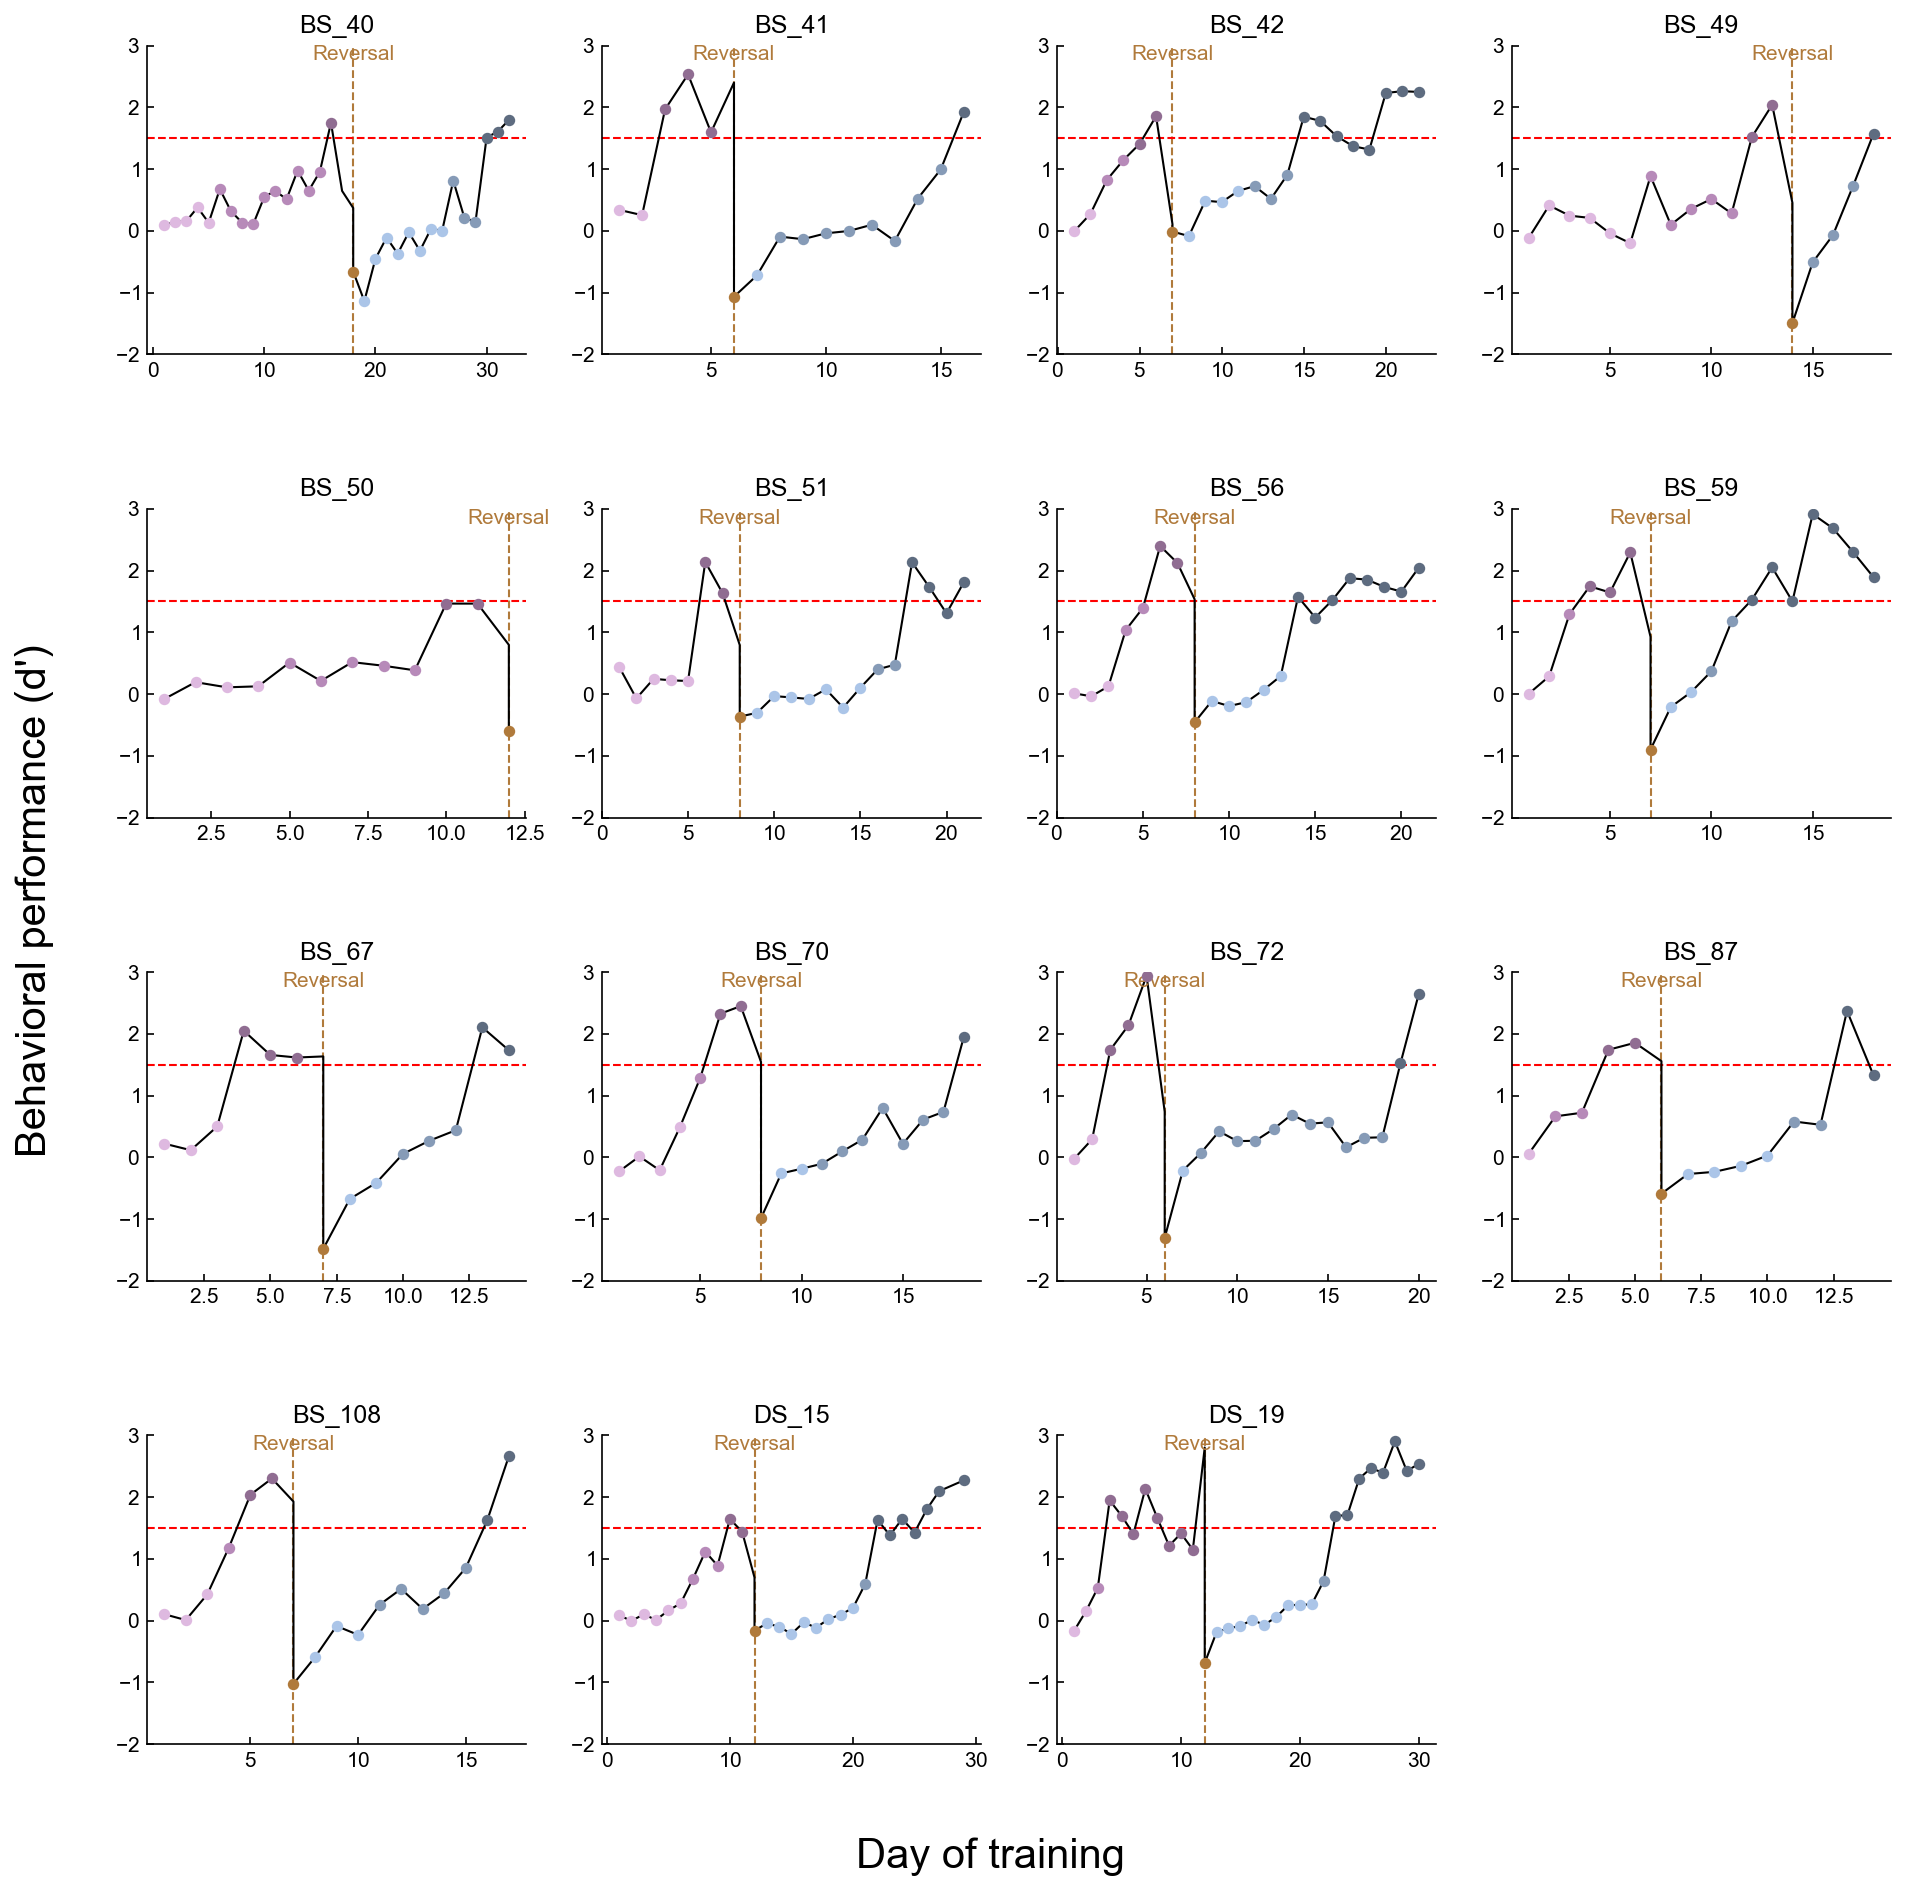

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


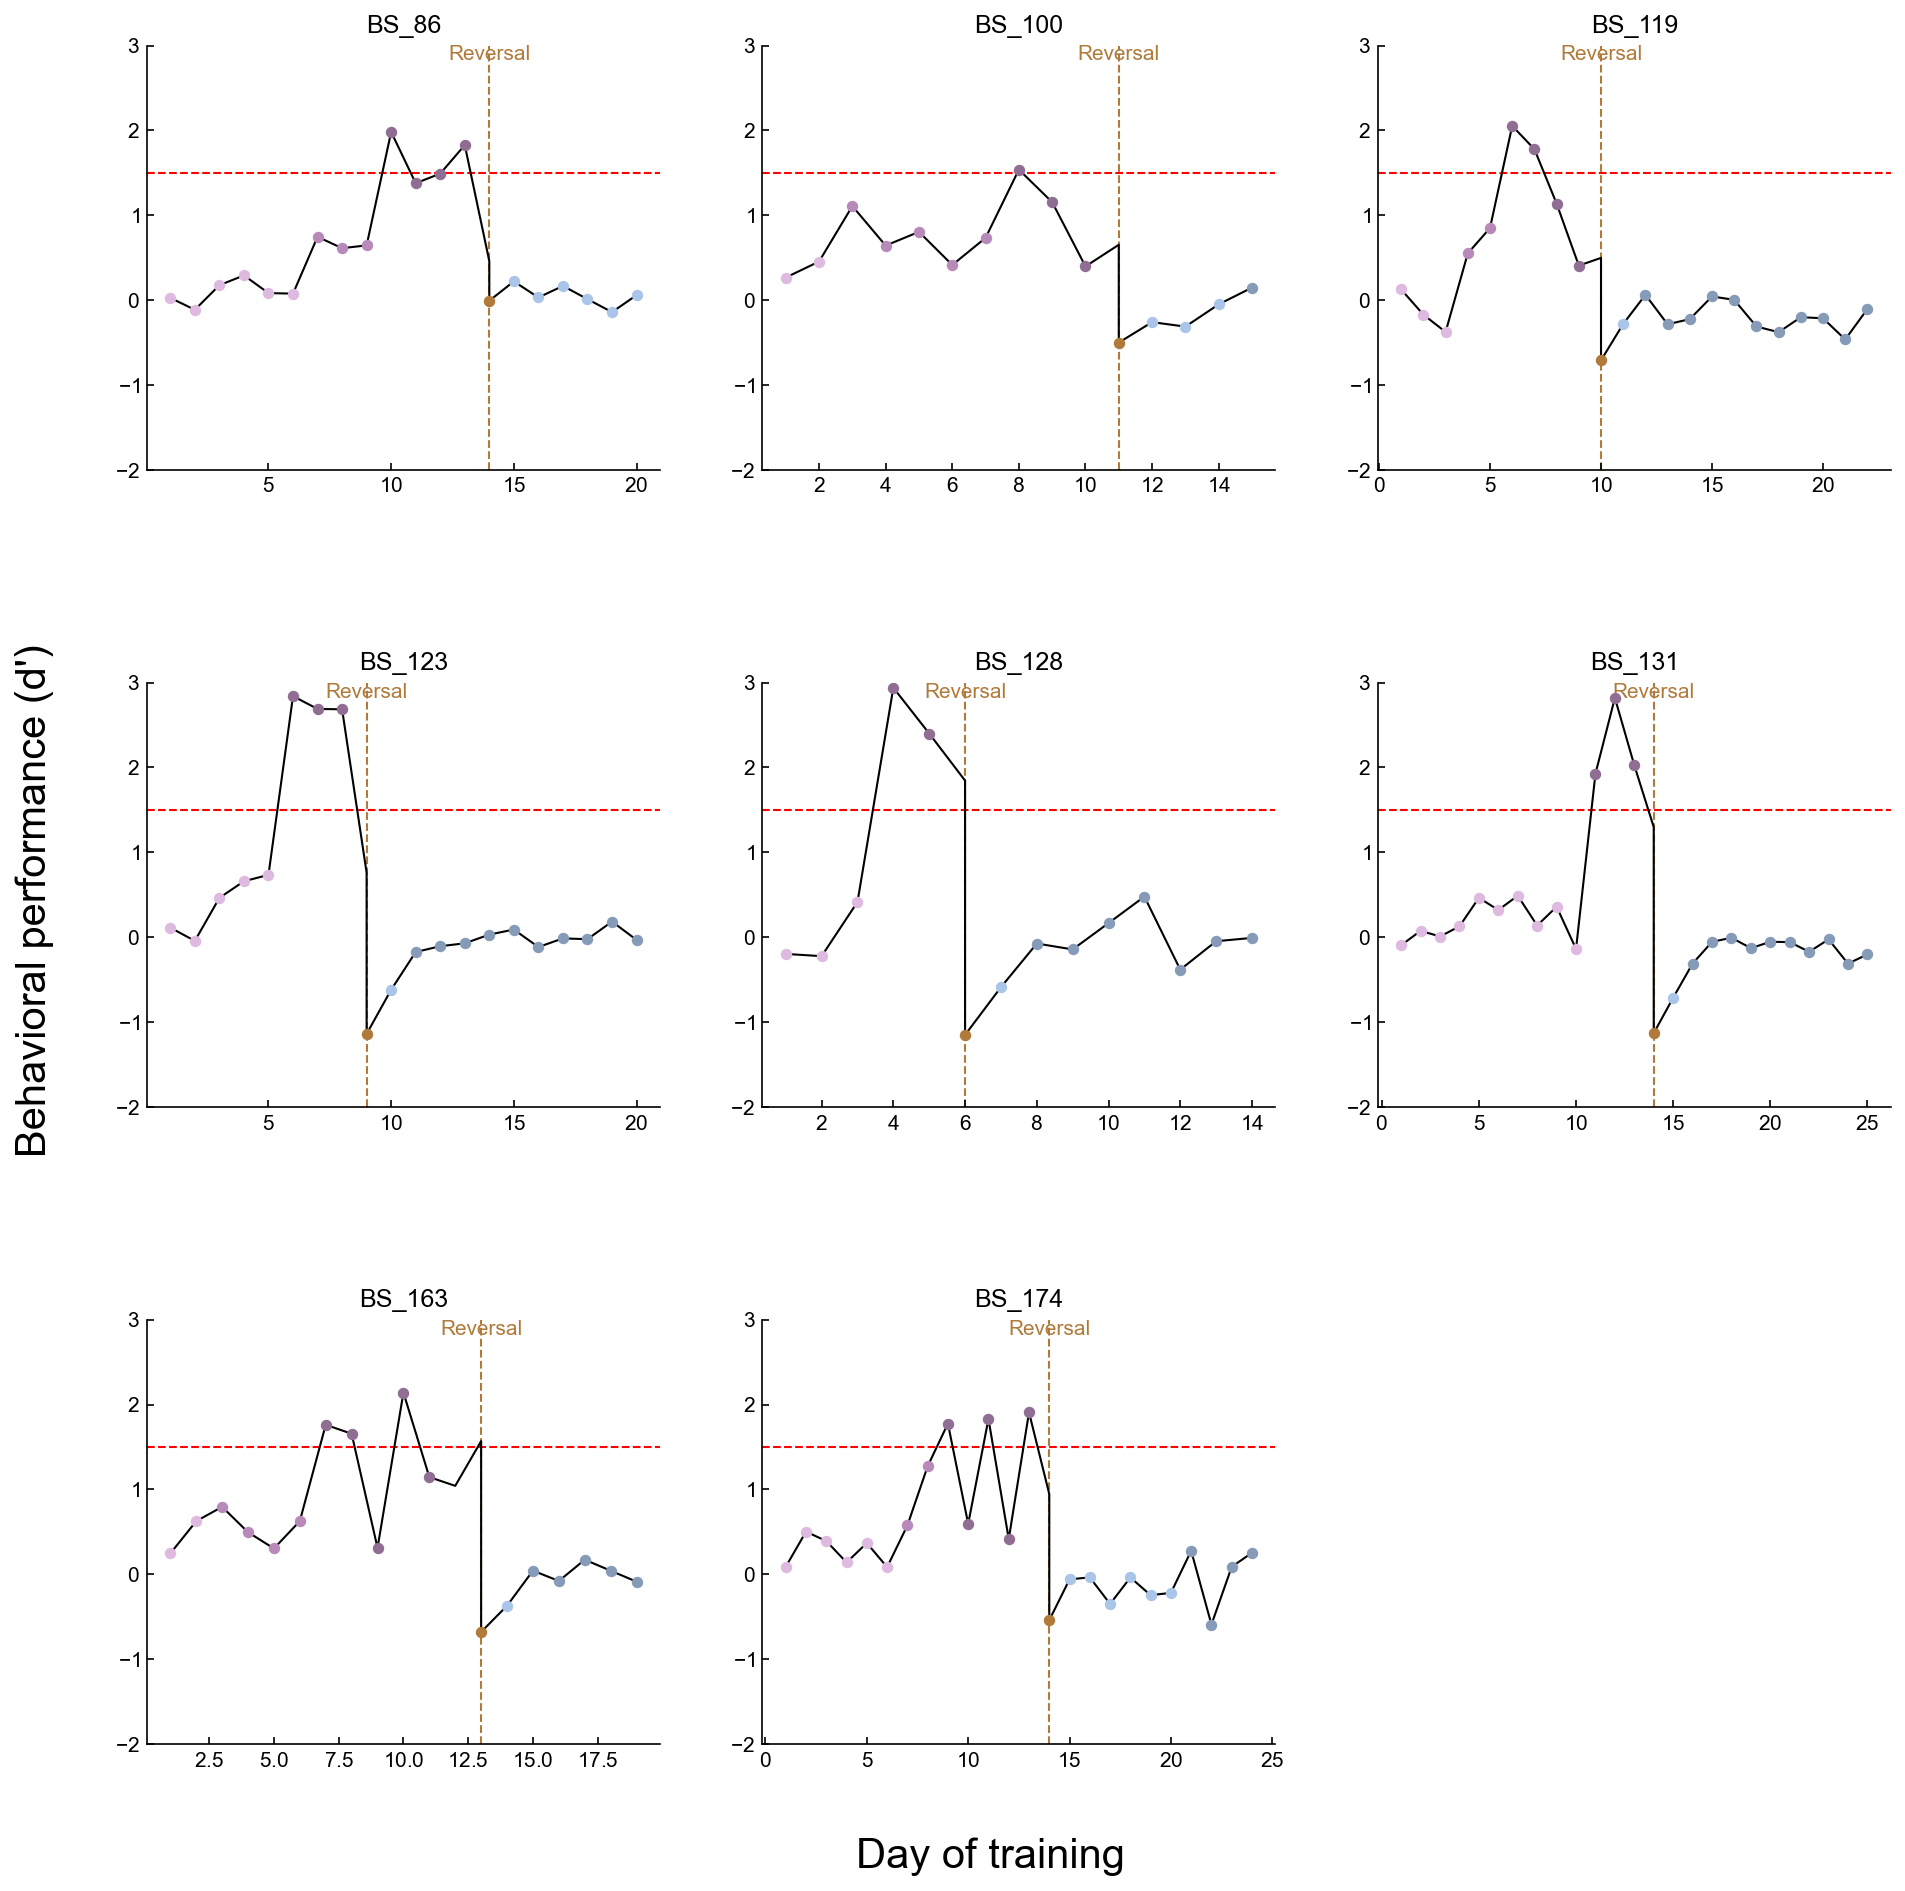

In [4]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True,noTrim=False)
learning_phases2,_,_ = ilep.calculateLearningPhasesV2(did_not_learn_animals,animalBehaviors,plot=True,noTrim=False,noTrimPost=True)
for d in learning_phases2:
    learning_phases[d] = learning_phases2[d]

In [5]:
EnumSessionOps = []
# EnumClust = []
sessions = os.listdir(ops_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in did_not_learn:
        continue
    
    EnumSessionOps.append(session)
    
#     for clust in sessionfile.clusters.good:
#         EnumSession.append(session)
#         EnumClust.append(clust)

100%|██████████| 167/167 [00:03<00:00, 48.53it/s]


In [6]:
EILphasesOps = np.full_like(EnumSessionOps,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSessionOps)):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        rev_day = animalBehaviors[sessionfile.meta.animal].reversal
        day_relative_to_rev = day - rev_day
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphasesOps[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphasesOps[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphasesOps[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphasesOps[idx] = 'pre expert'

        elif day_relative_to_rev in [1,2,3,4]:
            EILphasesOps[idx] = 'post early'
        elif day_relative_to_rev in [5,6,7]:
            EILphasesOps[idx] = 'post late'
        elif day_relative_to_rev >= 8:
            EILphasesOps[idx] = 'post expert'
    except Exception as e:
#         print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        print(e)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 59/59 [00:00<00:00, 78.96it/s] 

errors for: []


In [7]:
EnumSession = []
# EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    EnumSession.append(session)
    
#     for clust in sessionfile.clusters.good:
#         EnumSession.append(session)
#         EnumClust.append(clust)

100%|██████████| 740/740 [00:12<00:00, 60.85it/s] 


In [8]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 144/144 [00:01<00:00, 102.36it/s]

errors for: []


In [5]:
#rc = Client('/Users/balbanna/.starcluster/ipcluster/SecurityGroup:@sc-MI-us-east-1.json', sshkey='/Users/badr/.ssh/EC2key.rsa')
rc = Client()
dv = rc[:]
dv.block = True
dv.activate()
print("Number of active engines: {0}".format(len(dv)))

Number of active engines: 16


In [6]:
%%px --block
import InsanallyLabEphysTools as ilep

#%load_ext autoreload
#%autoreload 2

%px: 100%|██████████| 16/16 [00:00<00:00, 19.18tasks/s]


In [9]:
sessionfile.clusters.good

array([15, 18, 53, 56, 57, 62, 68], dtype=int64)

In [10]:
sessionfile.meta

namespace(directory='D:\\DualRecording\\DS_19\\DS_19 9\\AC\\',
          region='AC',
          animal='DS_19',
          probe=6928,
          date='05/04/2021',
          depth=1300,
          task='reversal',
          day_of_training=19,
          day_of_recording=9,
          day_of_reversal=8,
          length_in_samples=99398253.0,
          files=['May 4 2021 Dual DS_19_9001',
                 'May 4 2021 Dual DS_19_9002',
                 'May 4 2021 Dual DS_19_9003',
                 'May 4 2021 Dual DS_19_9004',
                 'May 4 2021 Dual DS_19_9005'],
          arraystart=0,
          tonelength=0.1,
          triallength=2.5,
          lickdelayrelativetostart=0,
          lickdelayrelativetotone=-0.1,
          fs=30000,
          length_in_seconds=3313.2751,
          length_in_minutes=55.22125166666667,
          length_in_trials=661)

In [246]:
with open('C:\\Users\\insan\\Desktop\\trialsToUsePerDay', 'rb') as f:
        trialsPerDayLoaded = pickle.load(f)
rates = get_separable_rates(sessionfile,sessionfile.clusters.good,'all_trials',bin_length_msec=50,trialsPerDayLoaded=trialsPerDayLoaded,pre_stim_padding_sec=0.2)

In [247]:
len(np.concatenate(rates[0]))

20034

In [248]:
float(np.cov(np.concatenate(rates[0])))

64.02859261453894

In [249]:
a = np.concatenate(rates[0])
b = np.concatenate(rates[17])

In [250]:
a

array([ 0.,  0., 40., ..., 40.,  0.,  0.])

In [251]:
b

array([ 0., 40., 20., ...,  0.,  0.,  0.])

In [252]:
c = np.vstack((a,b))

In [253]:
d = np.cov(c)

In [254]:
d.shape == (2,2)

True

# Function Definitions

In [11]:
# sq_vars = []
# sq_covars = []
# pred_covars = []
# covars = []

# def calculate_avg_sq_var(directory,session):

#     sessionfile = ilep.loadSessionCached(directory,session)
#     ensemble = sessionfile.clusters.good
#     n_clust = len(ensemble)
#     if (n_clust < 2):
#         return np.nan,np.nan,np.nan
    
#     with open('C:\\Users\\insan\\Desktop\\trialsToUsePerDay', 'rb') as f:
#         trialsPerDayLoaded = pickle.load(f)
#     rates = ilep.flatten_rates(sessionfile,ensemble,'all_trials',bin_length_msec=50,trialsPerDayLoaded=trialsPerDayLoaded,pre_stim_padding_sec=0.2)
#     cov_mat = np.cov(rates)
    
#     variances = cov_mat[np.eye(n_clust,n_clust,dtype='bool')]
#     covariances = cov_mat[~np.eye(n_clust,n_clust,dtype='bool')]

#     avg_sq_vars = np.mean(variances**2)
#     avg_sq_covars = np.mean(covariances**2)
#     covars.append(np.mean(covariances))
#     avg_pred_covars = np.mean(np.outer(variances,variances)[~np.eye(n_clust,n_clust,dtype='bool')])
    
#     return avg_sq_vars,avg_sq_covars,avg_pred_covars

# for session in tqdm(EnumSession):
#     try:
#         a,b,c = calculate_avg_sq_var(act_directory,session)        
#         sq_vars.append(a)
#         sq_covars.append(b)
#         pred_covars.append(c)
#     except Exception as e:
#         print(f"{session} error: {e}")

In [12]:
def get_separable_rates(sessionfile,clusts,cond,bin_length_msec=50,pre_stim_padding_sec = 0.2,trialsPerDayLoaded=None):
    if type(clusts) == int or type(clusts) == float:
        clusts = [clusts]
    assert type(clusts) == list or type(clusts) == np.ndarray
    
    #allConds = ilep.getAllConditions(sessionfile,None,trialsPerDayLoaded=trialsPerDayLoaded)
    #trials = allConds[cond].trials
    trials = range(sessionfile.meta.length_in_trials)
    
    n_clusts = len(clusts)
    n_trials = len(trials)
    n_bins = int((sessionfile.meta.triallength+pre_stim_padding_sec)*1000 / bin_length_msec)
    
    rates_per_clust = dict()
    rates_per_clust['trials'] = trials
    for clust in clusts:
        rates_per_clust[clust] = []
    
    for clust in clusts:
        clust_rates = []
        clust_spikes = ilep.getSpikeTimes(sessionfile,clust=clust)
        
        for trial_idx,trial in enumerate(trials):
            trial_rates = np.full(n_bins,np.nan)
            for bin_idx,bin in enumerate(range(n_bins)):
                bin_start = sessionfile.trials.starts[trial] - pre_stim_padding_sec * sessionfile.meta.fs + bin*(bin_length_msec/1000*sessionfile.meta.fs)
                bin_end = bin_start + bin_length_msec/1000*sessionfile.meta.fs
                spike_times = ilep.getSpikeTimes(sessionfile,starttime=bin_start,endtime=bin_end,cachedtimes=clust_spikes)
                trial_rates[bin_idx] = len(spike_times) / bin_length_msec * 1000
            clust_rates.append(trial_rates)
        rates_per_clust[clust] = clust_rates
    return rates_per_clust

In [13]:
def get_trimmed_cov_mat(sessionfile,independent_trial_threshold=100,paired_trial_threshold=100,cond='all_trials',bin_length=50):
    clusts = sessionfile.clusters.good
    with open('C:\\Users\\insan\\Desktop\\trialsToUsePerDay', 'rb') as f:
        trialsPerDayLoaded = pickle.load(f)
    
    #Calculate variances
    rates = get_separable_rates(sessionfile,clusts,cond,bin_length_msec=bin_length,trialsPerDayLoaded=trialsPerDayLoaded,pre_stim_padding_sec=0.2)
    cov_mat = np.full((len(clusts),len(clusts)),np.nan)
    for clust_idx,clust in enumerate(clusts):
        clust_rates = np.array(rates[clust])
        trials = ilep.getAllConditions(sessionfile,clust)[cond].trials
        if len(trials) < independent_trial_threshold:
            cov_mat[clust_idx,clust_idx] = np.nan
            continue
        clust_rates = np.concatenate(clust_rates[trials])
        cov_mat[clust_idx,clust_idx] = float(np.cov(clust_rates))
    
    #Calculate pairwise covariances -- trim according to paired cells
    for i,clust_i in enumerate(clusts):
        for j,clust_j in enumerate(clusts):
            if i==j:
                continue
            
            #Remove covariances between cells with no overlapping firing
            allConds = ilep.getAllConditions(sessionfile,[clust_i,clust_j])
            if len(allConds[cond].trials) < paired_trial_threshold:
                cov_mat[i,j] = np.nan
                cov_mat[j,i] = np.nan
                continue
            
            #Extract paired rates
            trials_involved = allConds[cond].trials
            clust_i_rates = np.array(rates[clust_i])
            clust_i_rates = np.concatenate(clust_i_rates[trials_involved])
            clust_j_rates = np.array(rates[clust_j])
            clust_j_rates = np.concatenate(clust_j_rates[trials_involved])
            paired_rates = np.vstack((clust_i_rates,clust_j_rates))
            
            #Calculate paired covariances
            paired_cov_mat = np.cov(paired_rates)
            assert paired_cov_mat.shape == (2,2)
            assert paired_cov_mat[0,1] == paired_cov_mat[1,0]
            cov_mat[i,j] = paired_cov_mat[0,1]
            cov_mat[j,i] = paired_cov_mat[0,1]
            
    return cov_mat

In [14]:
def calculate_cov_mats(directory,session,cond='all_trials',CR_NCR_thresh=3.5,CRNCRcond=None,bin_length=50):
    if CRNCRcond is None:
        CRNCRcond = cond
    sessionfile = ilep.loadSessionCached(directory,session)
    ensemble = sessionfile.clusters.good
    n_clust = len(ensemble)
    if (n_clust < 2):
        return np.nan,np.nan,np.nan,np.nan
    
    with open('C:\\Users\\insan\\Desktop\\trialsToUsePerDay', 'rb') as f:
        trialsPerDayLoaded = pickle.load(f)
        
    cov_mat = get_trimmed_cov_mat(sessionfile,cond=cond,bin_length=bin_length)
#     rates = ilep.flatten_rates(sessionfile,ensemble,'all_trials',bin_length_msec=50,trialsPerDayLoaded=trialsPerDayLoaded,pre_stim_padding_sec=0.2)
#     cov_mat = np.cov(rates)
    
    FRmods = [sessionfile.responsiveness[clust][CRNCRcond].FRmodulation for clust in ensemble]
    mask_CR = np.greater_equal(FRmods,CR_NCR_thresh)
    mask_NCR = np.less(FRmods,CR_NCR_thresh)
    
    cov_mat_CR = np.array([c[mask_CR] for c in cov_mat[mask_CR]])
    cov_mat_NCR = np.array([c[mask_NCR] for c in cov_mat[mask_NCR]])
    
    cov_mat_CRNCR = np.copy(cov_mat)
    for i in range(len(FRmods)):
        for j in range(len(FRmods)):
            if mask_CR[i] and mask_CR[j]:
                cov_mat_CRNCR[i,j] = np.nan
            if mask_NCR[i] and mask_NCR[j]:
                cov_mat_CRNCR[i,j] = np.nan
    
    return cov_mat,cov_mat_CR,cov_mat_NCR,cov_mat_CRNCR
    
def calculate_dimm(cov_mat):
    assert cov_mat.shape[0] == cov_mat.shape[1]
    n_clust = cov_mat.shape[0]

    variances = cov_mat[np.eye(n_clust,n_clust,dtype='bool')]
    covariances = cov_mat[~np.eye(n_clust,n_clust,dtype='bool')]

    avg_sq_vars = np.mean(variances**2)
    avg_sq_covars = np.mean(covariances**2)
    avg_pred_covars = np.mean(np.outer(variances,variances)[~np.eye(n_clust,n_clust,dtype='bool')])
    
    d_var = (1+(n_clust-1)*(avg_pred_covars / avg_sq_vars))         /          (1+(n_clust-1)*0)
    d_cov = (1+(n_clust-1)*1)                                       /          (1+(n_clust-1)*(avg_sq_covars / avg_sq_vars))
    d_GT  = (1+(n_clust-1)*(avg_pred_covars / avg_sq_vars))         /          (1+(n_clust-1)*(avg_sq_covars / avg_sq_vars))
    
    return avg_sq_vars,avg_sq_covars,avg_pred_covars

# for session in tqdm(EnumSession):
#     try:
#         a,b,c = calculate_avg_sq_var(act_directory,session)        
#         sq_vars.append(a)
#         sq_covars.append(b)
#         pred_covars.append(c)
#     except Exception as e:
#         print(f"{session} error: {e}"

# Control

In [14]:
list_of_sessions = ilep.getListOfSessionsToCalculateResponsiveness(sorting_directory,animals_list = ephys_animals,replace=True,regions=['AC'])#,animals_list = ['AE_267'])
list_of_s_directory = [sorting_directory]*len(list_of_sessions)
list_of_c_directory = [cache_directory]*len(list_of_sessions)


dir_list = [act_directory]*len(EnumSession)
cond_list = ['all_trials']*len(EnumSession)
CR_NCR_thresh_list = [3.5]*len(EnumSession)
CRNCRcond = [None]*len(EnumSession)
bin_length_list = [50]*len(EnumSession)

directory,session,cond='all_trials',CR_NCR_thresh=3.5,CRNCRcond=None,bin_length=50):

start_time = datetime.now()
print('Starting run at: '+str(start_time))
res = dv.map_sync(calculate_cov_mats,dir_list,EnumSession,)

end_time = datetime.now()
print('Elapsed time: '+str(end_time-start_time))

Starting run at: 2024-04-03 14:07:45.642571
Elapsed time: 0:12:15.414044


In [15]:
cov_mats = []
cov_mats_CR = []
cov_mats_NCR = []
cov_mats_CRNCR = []

for session in tqdm(EnumSession):
    try:
        a,b,c,d = calculate_cov_mats(act_directory,session)        
        cov_mats.append(a)
        cov_mats_CR.append(b)
        cov_mats_NCR.append(c)
        cov_mats_CRNCR.append(d)
    except Exception as e:
        print(f"{session} error: {e}")
        raise e

 49%|████▊     | 70/144 [52:15<08:22,  6.79s/it]   

session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved ac

 49%|████▉     | 71/144 [52:17<07:05,  5.83s/it]

session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22


100%|██████████| 144/144 [1:35:16<00:00, 39.70s/it] 


In [16]:
Data = SimpleNamespace()
Data.cov_mats = cov_mats
Data.cov_mats_CR = cov_mats_CR
Data.cov_mats_NCR = cov_mats_NCR
Data.cov_mats_CRNCR = cov_mats_CRNCR
with open('D:\\Cov_Mats.pickle', 'wb') as f:
    pickle.dump(Data, f, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
with open('D:\\Cov_Mats.pickle', 'rb') as f:
    Data = pickle.load(f)

In [18]:
Data

namespace(cov_mats=[array([[ 54.3010501 ,  14.76378243,   1.62717022,  11.80107435,
                             15.93916708,  11.50370718],
                           [ 14.76378243, 243.47746986, -39.80829682,  20.92873032,
                             23.24896966,  12.92538967],
                           [  1.62717022, -39.80829682, 233.68896348,  25.50449647,
                              6.04873731,  37.80288612],
                           [ 11.80107435,  20.92873032,  25.50449647, 113.81034555,
                             14.84761198,  19.76285685],
                           [ 15.93916708,  23.24896966,   6.04873731,  14.84761198,
                            149.37404918,  26.40776699],
                           [ 11.50370718,  12.92538967,  37.80288612,  19.76285685,
                             26.40776699, 272.9239442 ]]),
                    array([[137.47946799,          nan,   7.21304285,   5.15684464],
                           [         nan,          nan,          na

## Control - 25ms

In [19]:
cov_mats = []
cov_mats_CR = []
cov_mats_NCR = []
cov_mats_CRNCR = []

for session in tqdm(EnumSession):
    try:
        a,b,c,d = calculate_cov_mats(act_directory,session,bin_length=25)        
        cov_mats.append(a)
        cov_mats_CR.append(b)
        cov_mats_NCR.append(c)
        cov_mats_CRNCR.append(d)
    except Exception as e:
        print(f"{session} error: {e}")
        raise e

 49%|████▊     | 70/144 [1:00:02<11:07,  9.02s/it] 

session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved ac

 49%|████▉     | 71/144 [1:00:07<09:42,  7.97s/it]

session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22


100%|██████████| 144/144 [1:52:13<00:00, 46.76s/it] 


In [20]:
Data = SimpleNamespace()
Data.cov_mats = cov_mats
Data.cov_mats_CR = cov_mats_CR
Data.cov_mats_NCR = cov_mats_NCR
Data.cov_mats_CRNCR = cov_mats_CRNCR
with open('D:\\Cov_Mats_25.pickle', 'wb') as f:
    pickle.dump(Data, f, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
with open('D:\\Cov_Mats_25.pickle', 'rb') as f:
    Data = pickle.load(f)

In [22]:
Data

namespace(cov_mats=[array([[ 83.99001459,  13.30873453,   4.58632254,  10.02985039,
                             16.24406191,  11.74771853],
                           [ 13.30873453, 404.28754954, -50.7671525 ,  20.67514394,
                             22.08890991,  11.41450324],
                           [  4.58632254, -50.7671525 , 388.57674429,  29.48372154,
                              6.45541367,  42.45798213],
                           [ 10.02985039,  20.67514394,  29.48372154, 202.59098823,
                             16.38961394,  26.75593745],
                           [ 16.24406191,  22.08890991,   6.45541367,  16.38961394,
                            236.46617269,  30.82667463],
                           [ 11.74771853,  11.41450324,  42.45798213,  26.75593745,
                             30.82667463, 474.59126375]]),
                    array([[261.97716891,          nan,   5.05109729,   5.22331279],
                           [         nan,          nan,          na

## Control - 100ms

In [23]:
cov_mats = []
cov_mats_CR = []
cov_mats_NCR = []
cov_mats_CRNCR = []

for session in tqdm(EnumSession):
    try:
        a,b,c,d = calculate_cov_mats(act_directory,session,bin_length=100)        
        cov_mats.append(a)
        cov_mats_CR.append(b)
        cov_mats_NCR.append(c)
        cov_mats_CRNCR.append(d)
    except Exception as e:
        print(f"{session} error: {e}")
        raise e

 49%|████▊     | 70/144 [47:59<07:01,  5.69s/it]   

session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved ac

 49%|████▉     | 71/144 [48:00<05:47,  4.76s/it]

session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22


100%|██████████| 144/144 [1:26:04<00:00, 35.86s/it]


In [24]:
Data = SimpleNamespace()
Data.cov_mats = cov_mats
Data.cov_mats_CR = cov_mats_CR
Data.cov_mats_NCR = cov_mats_NCR
Data.cov_mats_CRNCR = cov_mats_CRNCR
with open('D:\\Cov_Mats_100.pickle', 'wb') as f:
    pickle.dump(Data, f, protocol=pickle.HIGHEST_PROTOCOL)

In [25]:
with open('D:\\Cov_Mats_100.pickle', 'rb') as f:
    Data = pickle.load(f)

In [26]:
Data

namespace(cov_mats=[array([[ 37.00991432,  12.43903715,   0.39238907,  10.21071934,
                             16.12017295,  10.1276361 ],
                           [ 12.43903715, 165.503684  , -32.0175185 ,  18.72740281,
                             17.06714835,   6.7426776 ],
                           [  0.39238907, -32.0175185 , 154.34163478,  21.1138365 ,
                              4.50210588,  33.32787185],
                           [ 10.21071934,  18.72740281,  21.1138365 ,  65.69549716,
                             13.64770382,  17.92877278],
                           [ 16.12017295,  17.06714835,   4.50210588,  13.64770382,
                             96.8772388 ,  22.24428231],
                           [ 10.1276361 ,   6.7426776 ,  33.32787185,  17.92877278,
                             22.24428231, 149.57063138]]),
                    array([[78.57456213,         nan,  5.87277026,  3.97593708],
                           [        nan,         nan,         nan,     

## Control - Hit

In [15]:
cov_mats = []
cov_mats_CR = []
cov_mats_NCR = []
cov_mats_CRNCR = []

for session in tqdm(EnumSession):
    try:
        a,b,c,d = calculate_cov_mats(act_directory,session,cond='hit')        
        cov_mats.append(a)
        cov_mats_CR.append(b)
        cov_mats_NCR.append(c)
        cov_mats_CRNCR.append(d)
    except Exception as e:
        print(f"{session} error: {e}")
        raise e

 49%|████▊     | 70/144 [51:53<08:21,  6.77s/it]   

session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved ac

 49%|████▉     | 71/144 [51:55<07:04,  5.81s/it]

session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22


100%|██████████| 144/144 [1:34:29<00:00, 39.37s/it] 


In [16]:
Data = SimpleNamespace()
Data.cov_mats = cov_mats
Data.cov_mats_CR = cov_mats_CR
Data.cov_mats_NCR = cov_mats_NCR
Data.cov_mats_CRNCR = cov_mats_CRNCR
with open('D:\\Cov_Mats_Hit.pickle', 'wb') as f:
    pickle.dump(Data, f, protocol=pickle.HIGHEST_PROTOCOL)

## Control - Miss

In [17]:
cov_mats = []
cov_mats_CR = []
cov_mats_NCR = []
cov_mats_CRNCR = []

for session in tqdm(EnumSession):
    try:
        a,b,c,d = calculate_cov_mats(act_directory,session,cond='miss')        
        cov_mats.append(a)
        cov_mats_CR.append(b)
        cov_mats_NCR.append(c)
        cov_mats_CRNCR.append(d)
    except Exception as e:
        print(f"{session} error: {e}")
        raise e

 49%|████▊     | 70/144 [51:31<08:19,  6.75s/it]   

session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved ac

 49%|████▉     | 71/144 [51:33<07:03,  5.80s/it]

session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22


100%|██████████| 144/144 [1:34:02<00:00, 39.18s/it] 


In [18]:
Data = SimpleNamespace()
Data.cov_mats = cov_mats
Data.cov_mats_CR = cov_mats_CR
Data.cov_mats_NCR = cov_mats_NCR
Data.cov_mats_CRNCR = cov_mats_CRNCR
with open('D:\\Cov_Mats_Miss.pickle', 'wb') as f:
    pickle.dump(Data, f, protocol=pickle.HIGHEST_PROTOCOL)

## Control - Falarm

In [19]:
cov_mats = []
cov_mats_CR = []
cov_mats_NCR = []
cov_mats_CRNCR = []

for session in tqdm(EnumSession):
    try:
        a,b,c,d = calculate_cov_mats(act_directory,session,cond='falarm')        
        cov_mats.append(a)
        cov_mats_CR.append(b)
        cov_mats_NCR.append(c)
        cov_mats_CRNCR.append(c)
    except Exception as e:
        print(f"{session} error: {e}")
        raise e

 49%|████▊     | 70/144 [52:16<08:26,  6.85s/it]   

session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved ac

 49%|████▉     | 71/144 [52:19<07:08,  5.87s/it]

session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22


100%|██████████| 144/144 [1:35:23<00:00, 39.75s/it] 


In [20]:
Data = SimpleNamespace()
Data.cov_mats = cov_mats
Data.cov_mats_CR = cov_mats_CR
Data.cov_mats_NCR = cov_mats_NCR
Data.cov_mats_CRNCR = cov_mats_CRNCR
with open('D:\\Cov_Mats_FAlarm.pickle', 'wb') as f:
    pickle.dump(Data, f, protocol=pickle.HIGHEST_PROTOCOL)

## Control - Creject

In [21]:
cov_mats = []
cov_mats_CR = []
cov_mats_NCR = []
cov_mats_CRNCR = []

for session in tqdm(EnumSession):
    try:
        a,b,c,d = calculate_cov_mats(act_directory,session,cond='creject')        
        cov_mats.append(a)
        cov_mats_CR.append(b)
        cov_mats_NCR.append(c)
        cov_mats_CRNCR.append(c)
    except Exception as e:
        print(f"{session} error: {e}")
        raise e

 49%|████▊     | 70/144 [52:10<08:25,  6.82s/it]   

session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust 4 tried to load saved ac

 49%|████▉     | 71/144 [52:12<07:07,  5.85s/it]

session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22
session BS_56_7_AC_10-29-2021 clust [12, 4] tried to load saved active trials but failed. Error: 22


100%|██████████| 144/144 [1:35:07<00:00, 39.63s/it] 


In [22]:
Data = SimpleNamespace()
Data.cov_mats = cov_mats
Data.cov_mats_CR = cov_mats_CR
Data.cov_mats_NCR = cov_mats_NCR
Data.cov_mats_CRNCR = cov_mats_CRNCR
with open('D:\\Cov_Mats_CReject.pickle', 'wb') as f:
    pickle.dump(Data, f, protocol=pickle.HIGHEST_PROTOCOL)

# Opto On

In [ ]:
cov_mats = []
cov_mats_CR = []
cov_mats_NCR = []
cov_mats_CRNCR = []

for session in tqdm(EnumSessionOps):
    try:
        a,b,c,d = calculate_cov_mats(ops_directory,session,cond='laser_on',CR_NCR_thresh=1.8,CRNCRcond='laser_off')
        cov_mats.append(a)
        cov_mats_CR.append(b)
        cov_mats_NCR.append(c)
        cov_mats_CRNCR.append(d)
    except Exception as e:
        print(f"{session} error: {e}")
        raise e

In [ ]:
Data = SimpleNamespace()
Data.sessions = EnumSessionOps
Data.cov_mats = cov_mats
Data.cov_mats_CR = cov_mats_CR
Data.cov_mats_NCR = cov_mats_NCR
Data.cov_mats_CRNCR = cov_mats_CRNCR
with open('D:\\Cov_Mats_Opto_On.pickle', 'wb') as f:
    pickle.dump(Data, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('D:\\Cov_Mats_Opto_On.pickle', 'rb') as f:
    Data = pickle.load(f)

In [ ]:
Data

# Opto Off

In [ ]:
cov_mats = []
cov_mats_CR = []
cov_mats_NCR = []
cov_mats_CRNCR = []

for session in tqdm(EnumSessionOps):
    try:
        a,b,c,d = calculate_cov_mats(ops_directory,session,cond='laser_off',CR_NCR_thresh=1.8,CRNCRcond='laser_off')        
        cov_mats.append(a)
        cov_mats_CR.append(b)
        cov_mats_NCR.append(c)
        cov_mats_CRNCR.append(d)
    except Exception as e:
        print(f"{session} error: {e}")
        raise e

In [ ]:
Data = SimpleNamespace()
Data.sessions = EnumSessionOps
Data.cov_mats = cov_mats
Data.cov_mats_CR = cov_mats_CR
Data.cov_mats_NCR = cov_mats_NCR
Data.cov_mats_CRNCR = cov_mats_CRNCR
with open('D:\\Cov_Mats_Opto_Off.pickle', 'wb') as f:
    pickle.dump(Data, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('D:\\Cov_Mats_Opto_Off.pickle', 'rb') as f:
    Data = pickle.load(f)

In [ ]:
Data

In [269]:
sessionfile.clusters.good

array([  0,  17,  32,  33,  46,  58,  63,  83,  84,  94, 113, 119, 167,
       169, 173, 174, 186, 188, 194, 222, 227, 238, 246, 253, 261, 288,
       318, 327, 338, 342, 345, 346, 352, 354, 359, 360, 361, 363],
      dtype=int64)

In [111]:
EnumSession[24]

'BS_41_1_AC.pickle'

In [117]:
cov = Data.cov_mats[24]
for i,row in enumerate(cov):
    for j,col in enumerate(row):
        if col == 1323.1471545130914:
            print(f"{i},{j}")

8,36
36,8


In [123]:
print(sessionfile.clusters.good[8])
print(sessionfile.clusters.good[36])

84
361


In [125]:
sessionfile = ilep.loadSessionCached(act_directory,'BS_41_1_AC.pickle')
print(sessionfile.responsiveness[84]['all_trials'].FRmodulation)
print(sessionfile.responsiveness[361]['all_trials'].FRmodulation)

13.47865576748412
30.554041780199807


In [337]:
all_vars = []
for cov in Data.cov_mats:
    if type(cov) is float:
        continue
    cov = np.array(cov)
    if len(cov.shape) < 2:
        continue
    assert cov.shape[0] == cov.shape[1]
    n_clust = cov.shape[0]
    
    this_vars = cov[np.eye(n_clust,n_clust,dtype='bool')]
    all_vars.append(this_vars)
all_vars = np.concatenate(all_vars)

all_covars = []
for idx,cov in enumerate(Data.cov_mats):
    if type(cov) is float:
        continue
    cov = np.array(cov)
    if len(cov.shape) < 2:
        continue
    assert cov.shape[0] == cov.shape[1]
    n_clust = cov.shape[0]
    
    this_covars = cov[~np.eye(n_clust,n_clust,dtype='bool')]
    all_covars.append(this_covars)
all_covars = np.concatenate(all_covars)

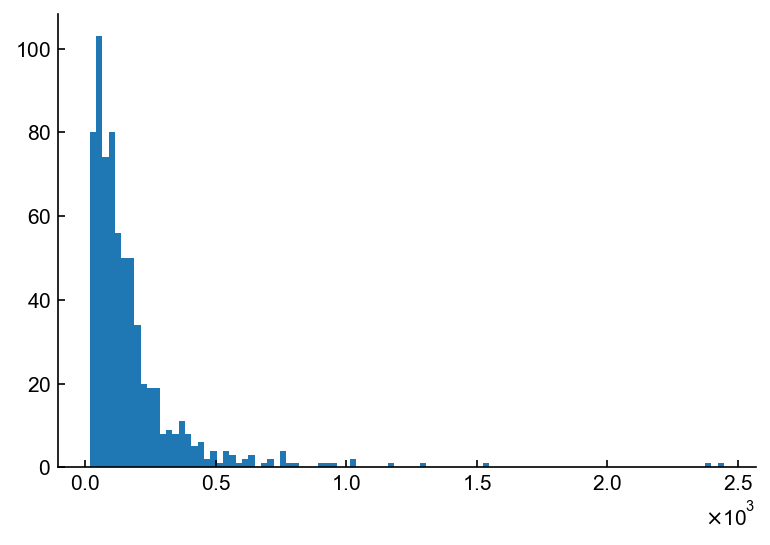

In [294]:
# CR
plt.hist(all_vars,bins=100)
pass

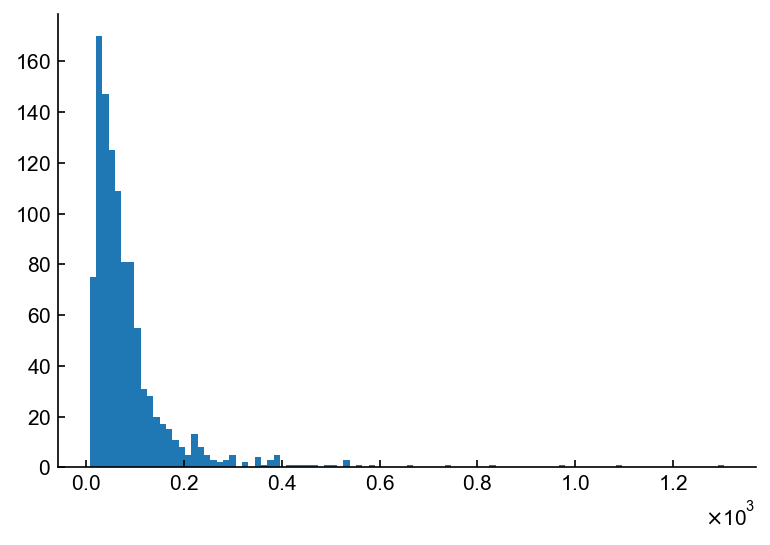

In [296]:
# NCR
plt.hist(all_vars,bins=100)
pass

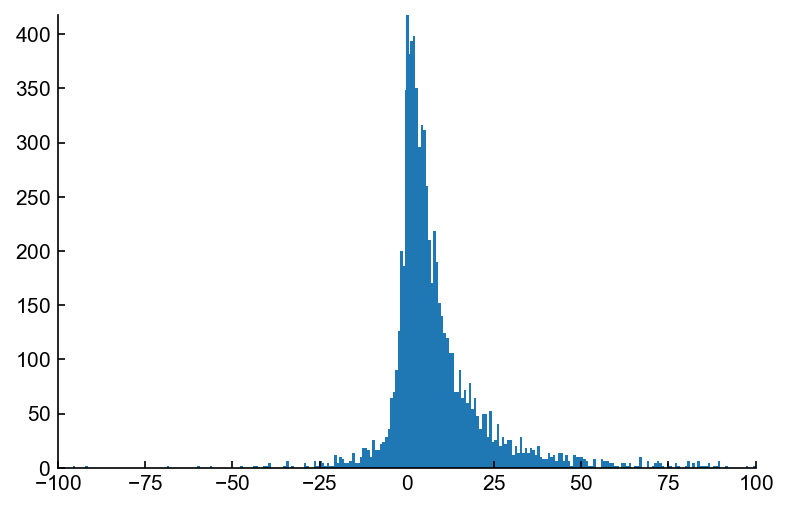

In [301]:
plt.hist(all_covars,bins=1000)
plt.xlim([-100,100])
plt.axvline(0)
pass

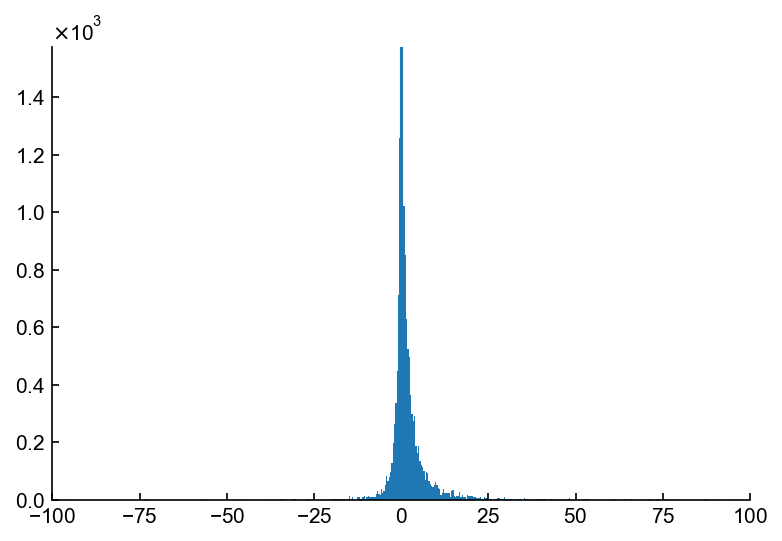

In [303]:
plt.hist(all_covars,bins=1000)
plt.xlim([-100,100])
plt.axvline(0)
pass

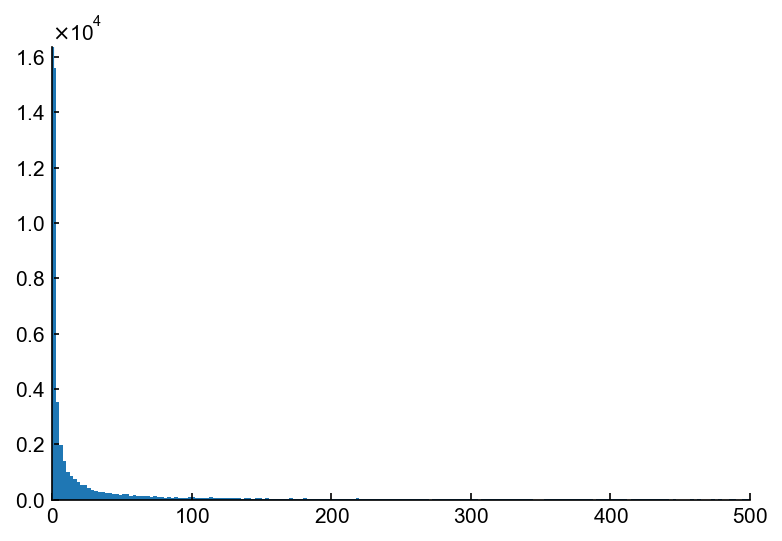

In [273]:
a = np.power(all_covars,2)
a = a[np.less(a,2500)]

plt.hist(a,bins=1000)
plt.xlim([0,500])
plt.axvline(0)
pass

In [274]:
max(np.abs(all_covars))

621.5088503606352

In [275]:
621.5088503606352*621.5088503606352

386273.2510765984

In [276]:
max((all_covars))

621.5088503606352

In [335]:
vals = []
n_fracs = np.linspace(0.3,1,80)
for n_frac in n_fracs:

    all_vars = []
    for cov in Data.cov_mats:
        if type(cov) is float:
            continue
        cov = np.array(cov)
        if len(cov.shape) < 2:
            continue
        assert cov.shape[0] == cov.shape[1]
        n_clust = cov.shape[0]

        new_n = int(n_clust*n_frac)
        if new_n < 1:
            continue
        mask = range(new_n)
        cov= np.array([c[mask] for c in cov[mask]])

        this_vars = cov[np.eye(new_n,new_n,dtype='bool')]
        all_vars.append(this_vars)
    all_vars = np.concatenate(all_vars)

    all_covars = []
    for idx,cov in enumerate(Data.cov_mats):
        if type(cov) is float:
            continue
        cov = np.array(cov)
        if len(cov.shape) < 2:
            continue
        assert cov.shape[0] == cov.shape[1]
        n_clust = cov.shape[0]

        new_n = int(n_clust*n_frac)
        if new_n < 1:
            continue
        mask = range(new_n)
        cov= np.array([c[mask] for c in cov[mask]])

        this_covars = cov[~np.eye(new_n,new_n,dtype='bool')]
        all_covars.append(this_covars)
    all_covars = np.concatenate(all_covars)




    n = len(all_vars)

    avg_sq_vars = np.nanmean(all_vars**2)
    avg_sq_covars = np.nanmean(all_covars**2)
    avg_pred_covars = np.nanmean(np.outer(all_vars,all_vars)[~np.eye(n,n,dtype='bool')])


    vals.append(calc_dim(n,avg_pred_covars/avg_sq_vars,avg_sq_covars/avg_sq_vars))

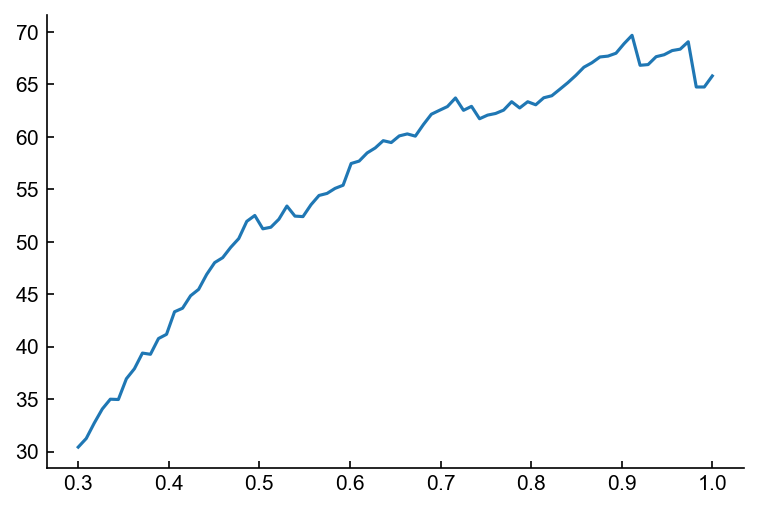

In [336]:
plt.plot(n_fracs,vals)
plt.